In [2]:
library("tidyverse")
library("moderndive")
library("infer")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
pennies_sample |> head()
pennies_sample |> tail()

ID,year
<int>,<dbl>
1,2002
2,1986
3,2017
4,1988
5,2008
6,1983


ID,year
<int>,<dbl>
45,1997
46,2017
47,1982
48,1988
49,2006
50,2017


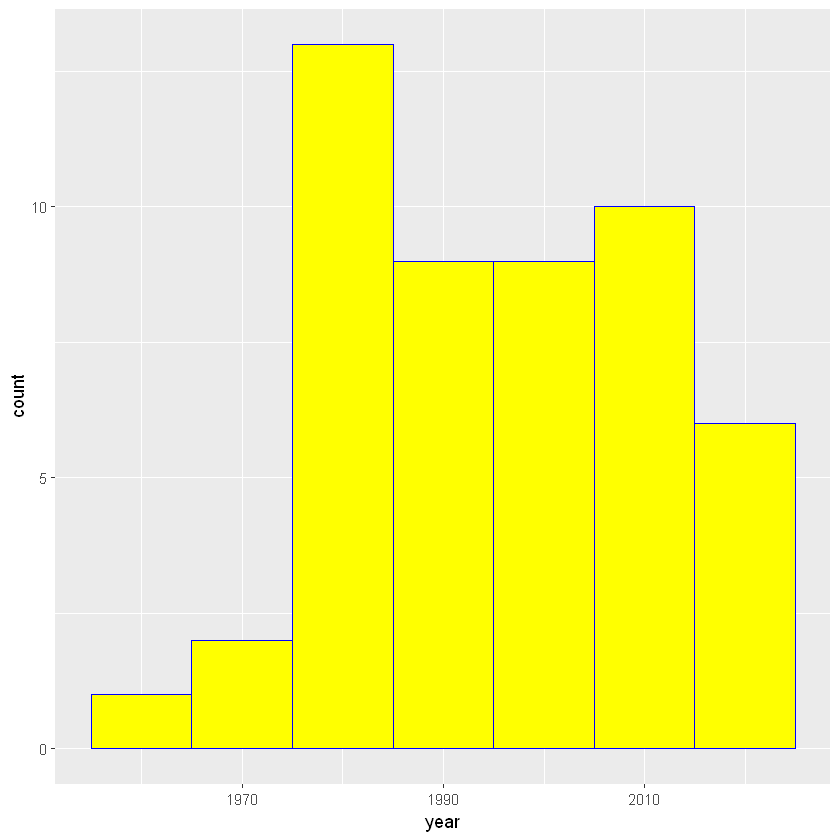

In [4]:
ggplot(data = pennies_sample, aes(x = year)) +
  geom_histogram(binwidth = 10, color = "blue", fill = "yellow")

In [5]:
pennies_resample <- tibble(
  year = c(1976, 1962, 1976, 1983, 2017, 2015, 2015, 1962, 2016, 1976, 
           2006, 1997, 1988, 2015, 2015, 1988, 2016, 1978, 1979, 1997, 
           1974, 2013, 1978, 2015, 2008, 1982, 1986, 1979, 1981, 2004, 
           2000, 1995, 1999, 2006, 1979, 2015, 1979, 1998, 1981, 2015, 
           2000, 1999, 1988, 2017, 1992, 1997, 1990, 1988, 2006, 2000)
)

In [6]:
x_bar <- pennies_sample |> summarise(mean_x = mean(year))
x_bar

x_resample_bar <- pennies_resample |> summarise(mean_x = mean(year))
x_resample_bar

x_resamples_bars <- pennies_resamples |> summarise(mean_x = mean(year))
x_resamples_bars

mean_x
<dbl>
1995.44


mean_x
<dbl>
1994.82


name,mean_x
<chr>,<dbl>
Arianna,1992.50
Artemis,1996.42
Bea,1996.32
Camryn,1996.90
Cassandra,1991.22
Cindy,1995.48
Claire,1995.52
Dahlia,1998.48
Dan,1993.86


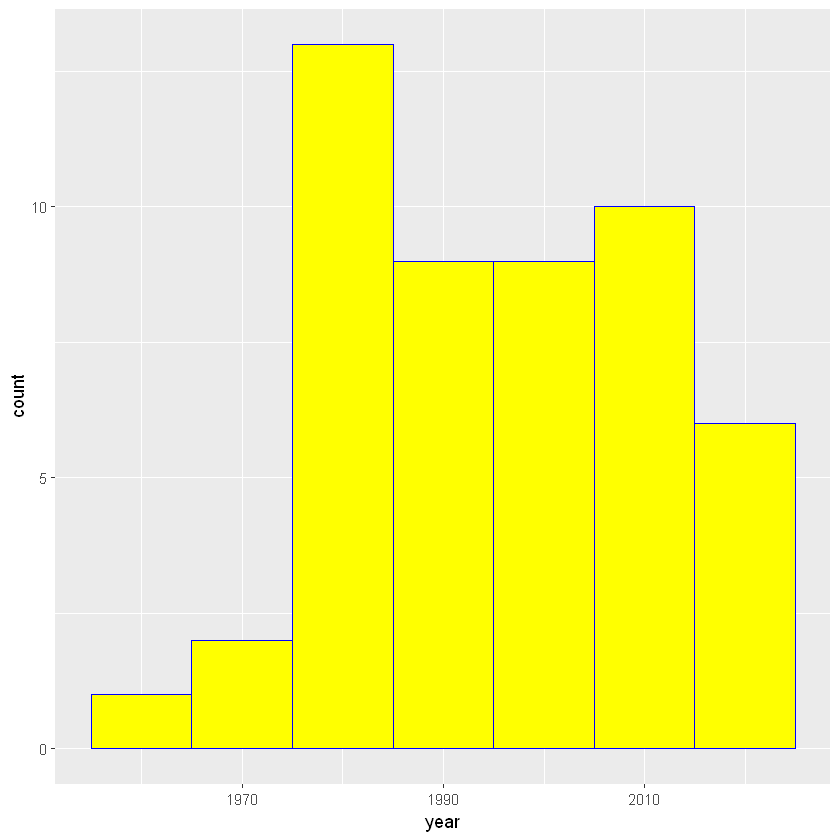

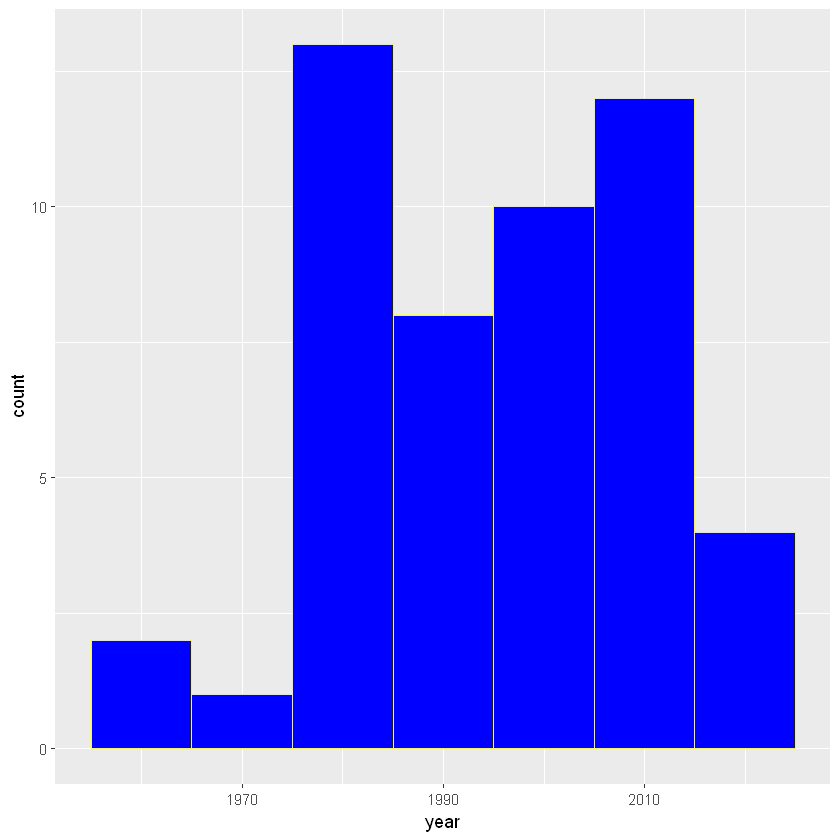

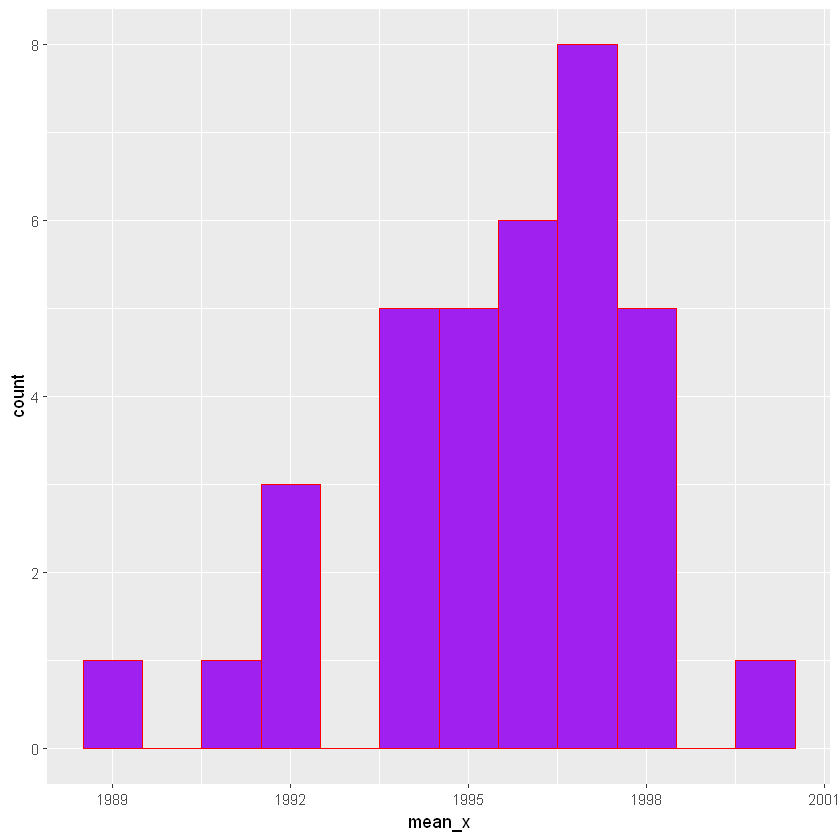

In [7]:
ggplot(data = pennies_sample, aes(x = year)) +
  geom_histogram(binwidth = 10, color = "blue", fill = "yellow")
ggplot(data = pennies_resample, aes(x = year)) +
  geom_histogram(binwidth = 10, color = "yellow", fill = "blue")
ggplot(data = x_resamples_bars, aes(x = mean_x)) +
  geom_histogram(binwidth = 1, color = "red", fill = "purple")

In [8]:
virtual_resample <- pennies_resample |>
  rep_sample_n(size = 50, replace = TRUE, reps = 35)
virtual_resample |> head()
virtual_resample |> tail()

replicate,year
<int>,<dbl>
1,1978
1,2013
1,1979
1,2016
1,1990
1,1981


replicate,year
<int>,<dbl>
35,1978
35,1976
35,2015
35,2017
35,1979
35,2004


In [9]:
virt_resampled_mean <- virtual_resample |>
  group_by(replicate) |>
  summarise(mean_x = mean(year))

virt_resampled_mean |> head()
virt_resampled_mean |> tail()

replicate,mean_x
<int>,<dbl>
1,1993.48
2,1990.78
3,1993.40
4,1994.06
5,1996.24
6,1996.94


replicate,mean_x
<int>,<dbl>
30,1992.28
31,1993.42
32,1992.50
33,1996.44
34,1998.88
35,1992.92


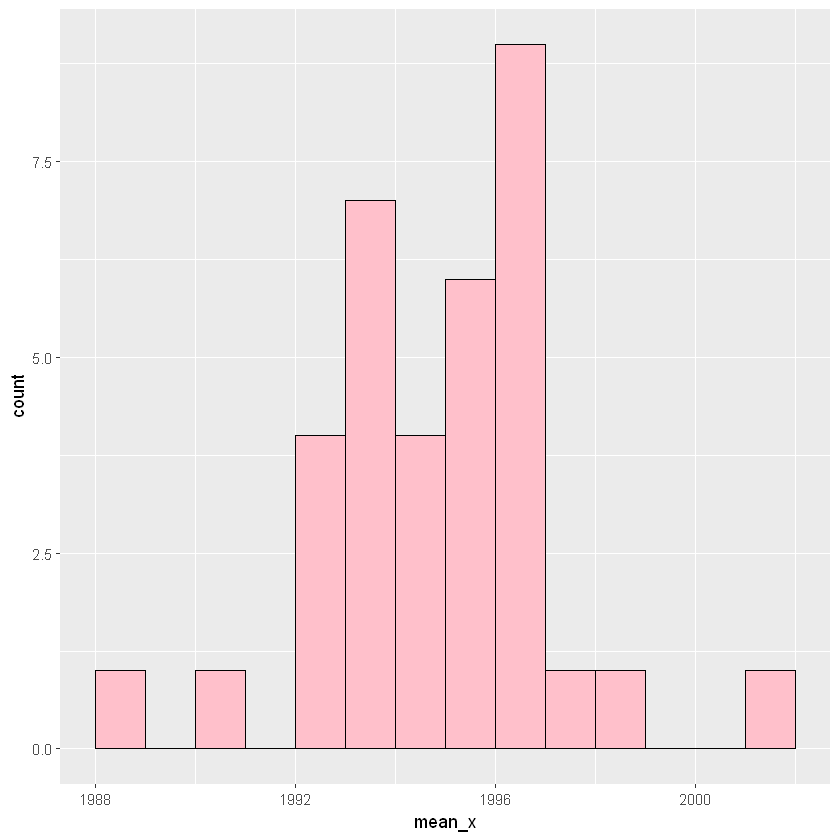

In [10]:
virt_resampled_mean |> ggplot(aes(x = mean_x)) +
  geom_histogram(binwidth = 1, color = "black", fill = "pink", boundary = 1990)

In [17]:
resample_1k <- pennies_sample |>
  rep_sample_n(size = 50, replace = TRUE, reps = 1000)
resample_1k |> head()
resample_1k |> tail()

replicate,ID,year
<int>,<int>,<dbl>
1,35,1985
1,22,1976
1,35,1985
1,36,2015
1,33,1979
1,36,2015


replicate,ID,year
<int>,<int>,<dbl>
1000,3,2017
1000,45,1997
1000,39,2015
1000,37,1962
1000,22,1976
1000,21,1981


In [25]:
virtual_resample_1k <- resample_1k |> group_by(replicate) |>
  summarize(mean_x = mean(year))

virtual_resample_1k |> head()
virtual_resample_1k |> tail()
se_resample_1k <- virtual_resample_1k |> summarize(SE = sd(mean_x))
se_resample_1k

replicate,mean_x
<int>,<dbl>
1,1998.10
2,1993.48
3,1994.68
4,1995.96
5,1996.04
6,1996.12


replicate,mean_x
<int>,<dbl>
995,1994.86
996,1994.54
997,1993.90
998,1997.84
999,1997.20
1000,1996.06


SE
<dbl>
2.10963


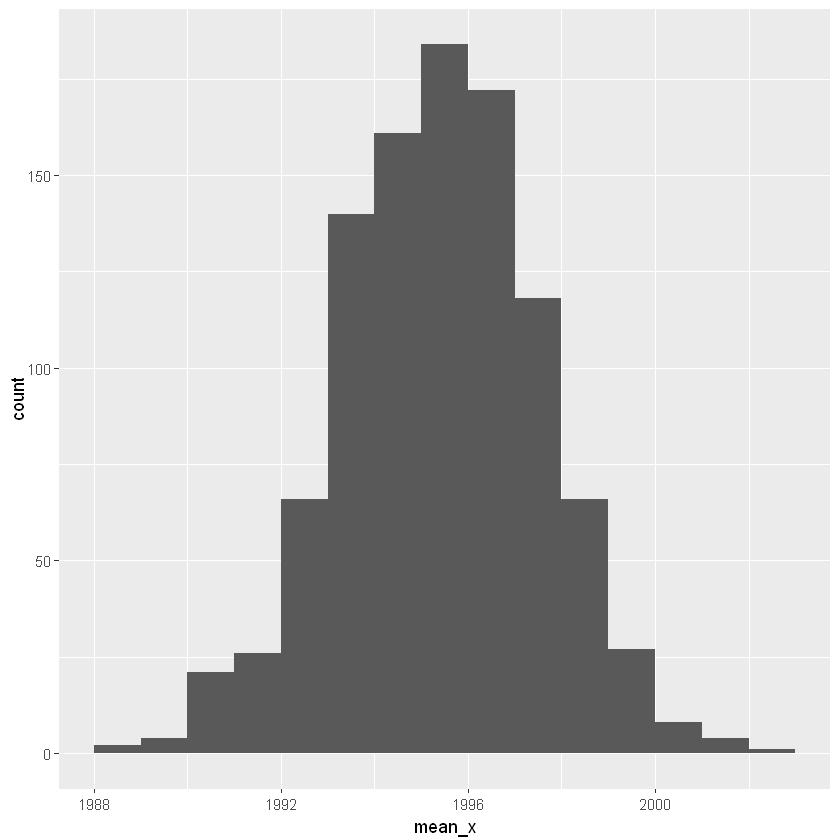

In [ ]:
virtual_resample_1k |> ggplot(aes(x = mean_x)) +
  geom_histogram(binwidth = 1, boundary = 1990) +
  geom_vline(xintercept = )